In [ ]:
!pip install shap

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import shap

In [ ]:
#Import from Github raw url

df = pd.read_csv('https://raw.githubusercontent.com/RomyMorsy/Project1/master/breast_cancer_dataset.csv')

In [ ]:
df.columns

Index(['clump_thickness', 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitosis', 'class'],
      dtype='object')

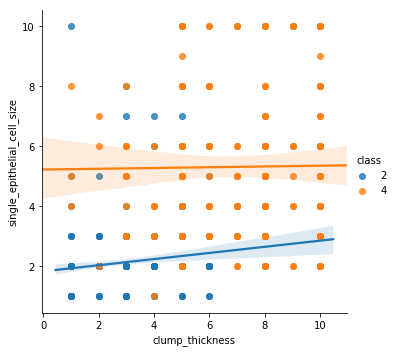

In [ ]:
fig = sns.lmplot('clump_thickness','single_epithelial_cell_size',data=df,hue='class');
fig.savefig('output.jpg')

In [ ]:
from PIL import Image
image = Image.open("/content/output.jpg")


### Based on the graph up above, it looks like the problem that the model we will be using will be some sort of cluster classification problem.

In [ ]:
#The majority class estimation based on using the entire dataset and using the 
#mode as the majority baseline since this is a classification problem
majority_class = df['class'].mode()
y_pred = [majority_class]*len(df)

from sklearn.metrics import accuracy_score
accuracy_score(df['class'],y_pred)

0.6344463971880492

In [ ]:
from sklearn.model_selection import train_test_split

target = 'class'
X_train = df.drop(target,axis=1)
y_train = df[target]


X_train,X_val,y_train,y_val = train_test_split(
                                X_train,y_train,train_size=0.75,test_size=0.25,
                                stratify=y_train,random_state=42)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((426, 9), (143, 9), (426,), (143,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(

  LogisticRegression(solver='lbfgs',multi_class = 'auto',max_iter=10000)
)
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
y_pred = pipeline.predict(X_val)
accuracy_score(y_val,y_pred)


0.965034965034965

In [ ]:
from joblib import dump
dump(pipeline,'pipeline.joblib')

['pipeline.joblib']

In [ ]:
X_val.head()

In [ ]:
shap.initjs()
shap.force_plot(base_value=2,shap_values=y_pred,feature_names=X_train.columns)